## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


# Na początku sprawdźmy czy w naszej bazie danych mamy brakujące wartości

In [4]:
print(df.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


# Mamy sporo brakujących wartości w tabelach : age, cabin, boat, body i home.dest

# Na początku sprawdżmy porty w których wsiadali pasażerowie

In [5]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

### Teraz podzielmy je na klasy

In [6]:
emb_df= df.groupby(['embarked', 'pclass']).size().reset_index()
emb_df.columns = ['porty', 'klasa biletu', 'liczba']
stack_df = emb_df.pivot(index='porty', columns='klasa biletu', values='liczba')
stack_df

klasa biletu,1.0,2.0,3.0
porty,,,
C,141,28,101
Q,3,7,113
S,177,242,495


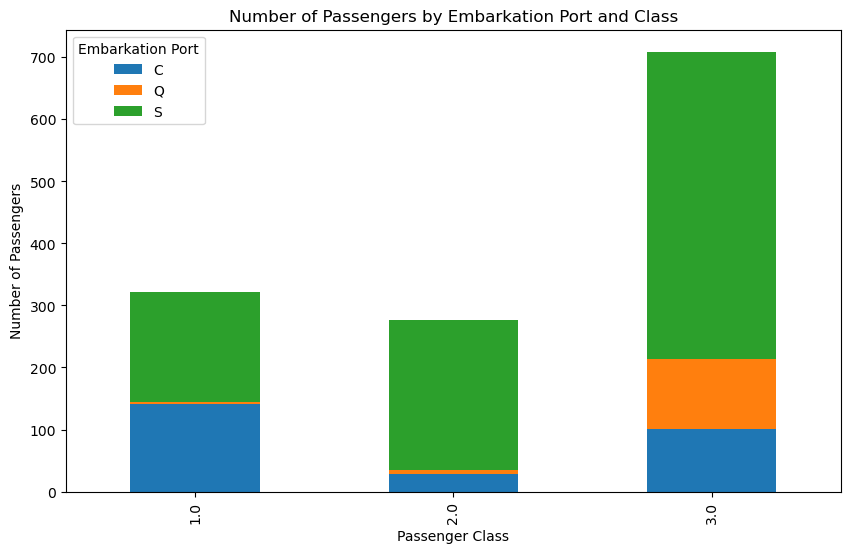

In [7]:
df = df

# Drop rows with missing 'embarked' or 'pclass' values
df_cleaned = df.dropna(subset=['embarked', 'pclass'])

# Group by 'pclass' and 'embarked', then count the number of passengers
grouped = df_cleaned.groupby(['pclass', 'embarked']).size().unstack()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Number of Passengers by Embarkation Port and Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.legend(title='Embarkation Port')

# Save the plot as a PNG file
plt.savefig('embarkation_port_by_class.png')

## Wniosek : Najwięcej ludzi weszło na statek w porcie Southampton, następnie  Cherbourg i najmniej osób w Queenstown

## W Southampton najwięcej ludzi wykupiło klasę 3 potem 2 i najmniej wykupili klasę 1. W Cherbourg najwięcej wykupili klasę 1 potem 3 i najmniej wykupili klasę 2. W Queenstown najwięcej wykupili klasę 3 potem 2 i raptem tylko 3 osoby kupiły 1 klasę

## Widać, że w Queenstown znaczna przewaga 3 klasy więc można stwierdzić, że to miasto miało najwięcej biednych ludzi w porównaniu z Cherbourg, w którym wykupiono więcej 1 klasy niż 3 klasy, więc w tym mieście żyło więcej bogatych ludzi. 3 miejsce pod względem bogactwa zajmuje Southampton, w którym więcej niż pierwszą klasę kupili 2 klasę, więc w tym mieście żyło się nie aż tak luksusowo jak w Cherbourg ale żyło się dostatnio, że można było pozwolić sobie na 2 klasę. Najbiedniej to było w Queenstown gdzie PRAWIE wszyscy wykupili 3 klasę, chcieli wyemigrować, ułożyć sobie życie w lepszym miejscu... no to wsiedli na Titanic.

# Z danych CSV widzimy ze pasażerów było 1309, zobaczmy ile w tym bylo kobiet, mężczyzn a ile dzieci

In [8]:
sex_df = df["sex"].value_counts().reset_index()
sex_df.columns=['płeć', 'liczba pasażerów']
sex_df['płeć'].replace({"male":"mężczyźni", "female":"kobiety"}, inplace=True)
sex_df

,płeć,liczba pasażerów
0,mężczyźni,843
1,kobiety,466


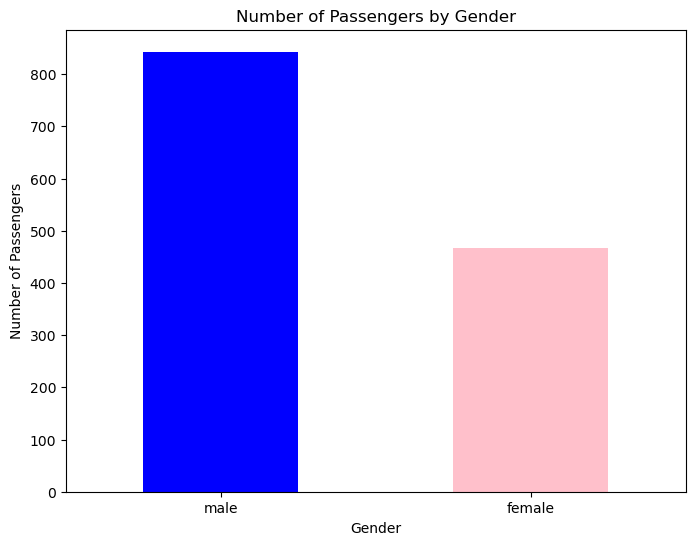

In [9]:
df = df

# Drop rows with missing 'sex' values
df = df.dropna(subset=['sex'])

# Count the number of passengers by gender
gender_counts = df['sex'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)

# Save the plot as a PNG file
plot_filename = 'gender_bar_plot.png'
plt.savefig(plot_filename)

In [10]:
child_df = df[df['age'] < 18].count()
print(child_df['age'])

154


In [11]:
baby_df = df[df['age'] <= 1].count()
print(baby_df['age'])

22


In [12]:
df['age'].max()

80.0

In [13]:
df['age'].min()

0.1667

# Wniosek : Na statku znajdowało się 466 kobiet i 843 mężczyzn, czyli mężczyz PRAWIE 2 razy więcej. Niestety byly też dzieci 154, wśród nich były niemowlaczki 22. Najstarszy pasażer miał 80 lat a najmłodszy 2 miesiace.

# Podział na klasy pasażerów

In [14]:
df_people_in_class = df.groupby('pclass')['name'].count()
df_people_in_class

pclass
1.0    323
2.0    277
3.0    709
Name: name, dtype: int64

In [15]:
df_people_in_class = df.groupby(['pclass','sex']).size().unstack()
df_people_in_class

sex,female,male
pclass,,
1.0,144,179
2.0,106,171
3.0,216,493


(array([0, 1, 2]), [Text(0, 0, '1.0'), Text(1, 0, '2.0'), Text(2, 0, '3.0')])

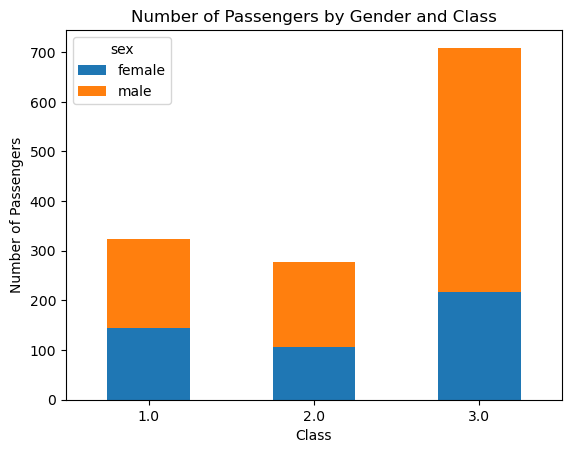

In [16]:
df = df

# Drop rows with missing values in 'pclass' or 'sex'
df_cleaned = df.dropna(subset=['pclass', 'sex'])

# Group by 'pclass' and 'sex' and count the number of passengers
grouped = df_cleaned.groupby(['pclass', 'sex']).size().unstack()

# Plotting
fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Number of Passengers by Gender and Class')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Passengers')
plt.xticks(rotation=0)

In [17]:
child_df = df[df['age'] < 18] 

In [18]:
ch_child_pclass_df = child_df.groupby(['pclass']).size().reset_index(name='liczba')
ch_child_pclass_df

,pclass,liczba
0,1.0,15
1,2.0,33
2,3.0,106


In [19]:
baby_df = df[df['age'] <= 1]

In [20]:
baby_df = child_df.groupby(['pclass']).size().reset_index(name='liczba')
baby_df

,pclass,liczba
0,1.0,15
1,2.0,33
2,3.0,106


In [ ]:
df = df

# Categorize passengers into adults, children, and infants
df['category'] = df['age'].apply(lambda x: 'Infant' if x <= 1 else ('Child' if x < 18 else 'Adult'))

# Drop rows with NaN values in 'pclass' or 'category'
df = df.dropna(subset=['pclass', 'category'])

# Create a bar plot
plt.figure(figsize=(10, 6))
df.groupby(['pclass', 'category']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Number of Passengers by Age Category and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Category')

# Save the plot as a PNG file
plt.savefig('passenger_age_category_by_class.png')

# Wniosek : Z liczb widzimy, że duża przewagą liczebna są ludzie z 3 klasy, w tym kobiety dzieci i niemowlęta.

# Kto Przeżył

In [21]:
survived_counts = df['survived'].value_counts()
survived_counts

0.0    809
1.0    500
Name: survived, dtype: int64

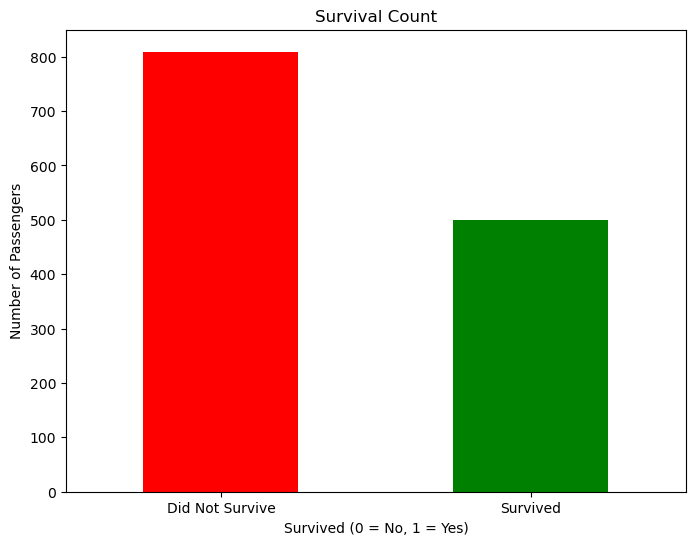

In [22]:
df = df

# Drop rows with NaN values in the 'survived' column
df_cleaned = df.dropna(subset=['survived'])

# Create a bar plot for survival count
survival_counts = df_cleaned['survived'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)

# Save the plot as a PNG file
plot_filename = "survival_count_plot.png"
plt.savefig(plot_filename)

In [23]:
survived_counts = df.groupby(['pclass','survived']).size().unstack()
survived_counts

survived,0.0,1.0
pclass,,
1.0,123,200
2.0,158,119
3.0,528,181


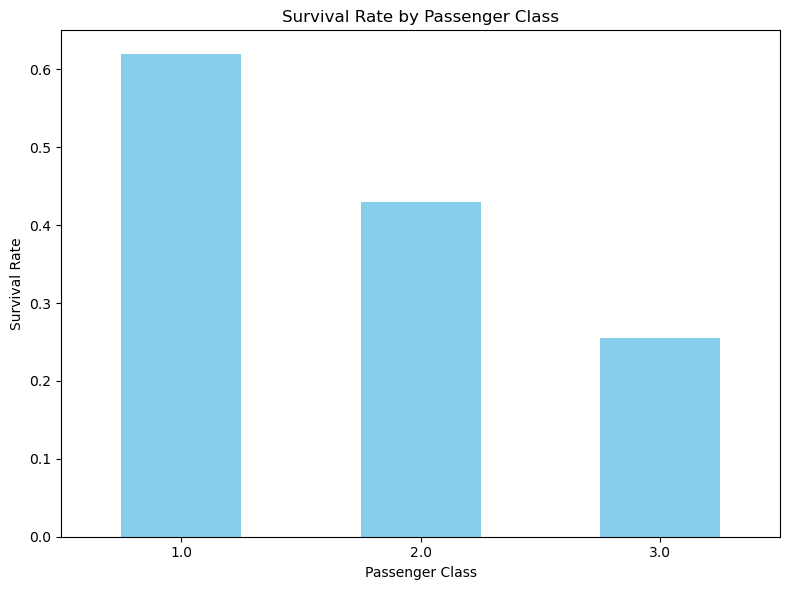

In [24]:
df = df

# Drop rows with missing values in 'pclass' or 'survived'
df_clean = df.dropna(subset=['pclass', 'survived'])

# Group by 'pclass' and calculate the mean survival rate
survival_by_class = df_clean.groupby('pclass')['survived'].mean()

# Plotting
plt.figure(figsize=(8, 6))
survival_by_class.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = 'survival_by_class.png'
plt.savefig(plot_filename)

In [25]:
survived_counts = df.groupby(['sex','survived']).size().unstack()
survived_counts

survived,0.0,1.0
sex,,
female,127,339
male,682,161


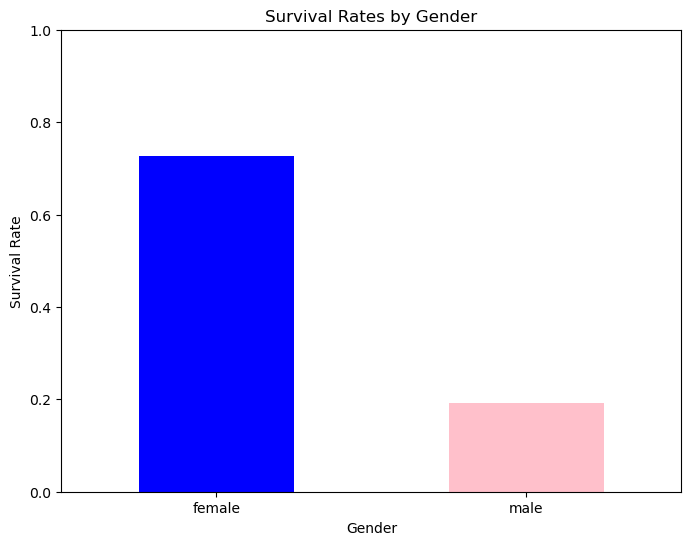

In [26]:
df = df

# Drop rows with missing values in 'survived' or 'sex' columns
df_cleaned = df.dropna(subset=['survived', 'sex'])

# Group by 'sex' and calculate the mean of 'survived' to get survival rates
survival_rates = df_cleaned.groupby('sex')['survived'].mean()

# Plotting
plt.figure(figsize=(8, 6))
survival_rates.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)

# Save the plot as a PNG file
plot_filename = 'survival_rates_by_gender.png'
plt.savefig(plot_filename)

In [27]:
survived_counts = df.groupby(['sex','survived','pclass']).size().unstack()
survived_counts

pclass           1.0  2.0  3.0
sex    survived               
female 0.0         5   12  110
       1.0       139   94  106
male   0.0       118  146  418
       1.0        61   25   75

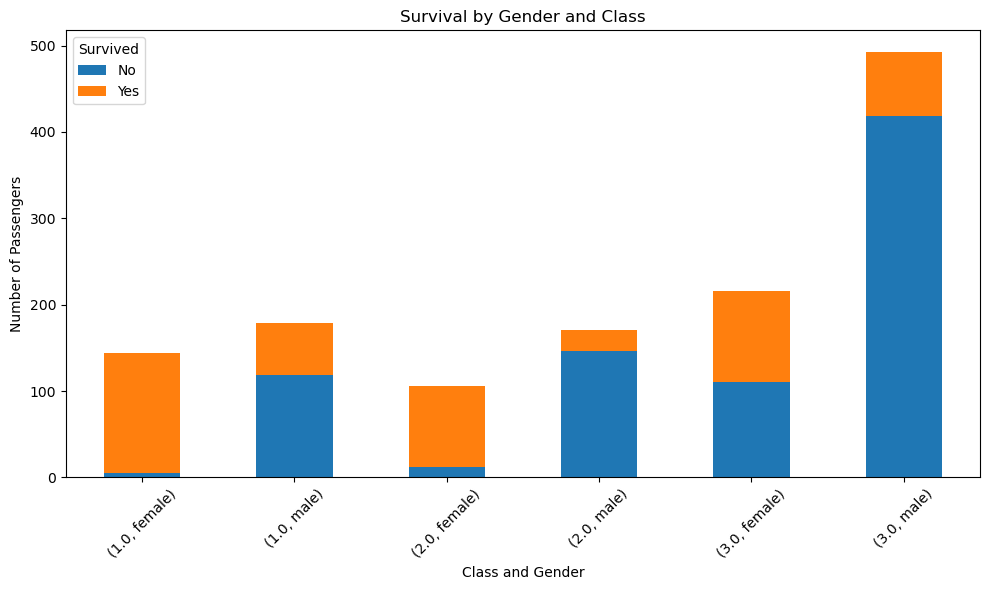

In [28]:
df = df

# Drop rows with missing values in 'pclass', 'survived', or 'sex' columns
df_clean = df.dropna(subset=['pclass', 'survived', 'sex'])

# Group by 'pclass', 'sex', and 'survived' to get counts
grouped = df_clean.groupby(['pclass', 'sex', 'survived']).size().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True, ax=ax)
plt.title('Survival by Gender and Class')
plt.xlabel('Class and Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "survival_by_gender_and_class.png"
plt.savefig(plot_filename)

In [29]:
child_df = df[df['age'] < 18]
ch_dead_pclass_df = child_df.groupby(['pclass', 'survived']).size().reset_index(name='liczba')
ch_dead_pclass_df = ch_dead_pclass_df.rename(columns={'pclass' : 'klasa'})
ch_dead_pclass_df

,klasa,survived,liczba
0,1.0,0.0,2
1,1.0,1.0,13
2,2.0,0.0,4
3,2.0,1.0,29
4,3.0,0.0,67
5,3.0,1.0,39


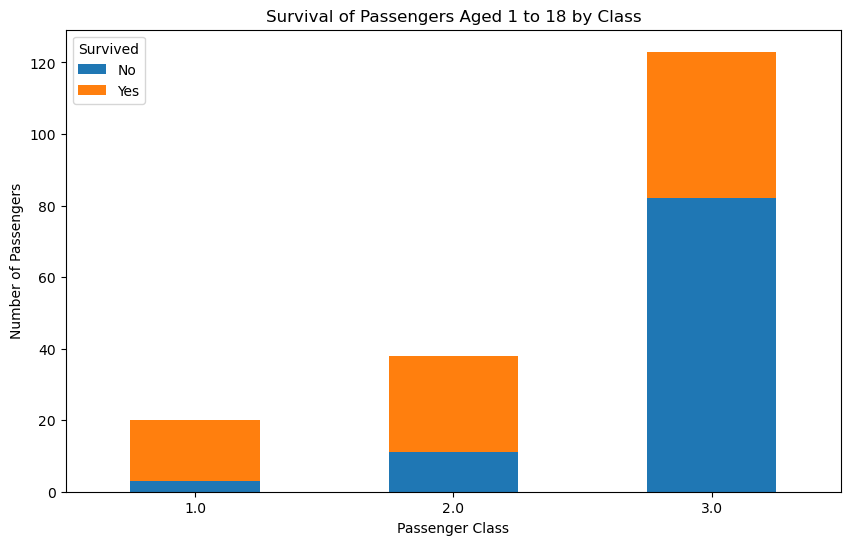

In [30]:
df = df

# Filter the DataFrame for passengers aged 1 to 18
filtered_df = df[(df['age'] >= 1) & (df['age'] <= 18)]

# Drop rows with missing values in 'pclass' or 'survived'
filtered_df = filtered_df.dropna(subset=['pclass', 'survived'])

# Group by 'pclass' and 'survived', then count the number of passengers
grouped = filtered_df.groupby(['pclass', 'survived']).size().unstack()

# Plot the bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival of Passengers Aged 1 to 18 by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived', labels=['No', 'Yes'])

# Save the plot as a PNG file
plt.savefig('survival_by_class_age_1_to_18.png')

In [31]:
baby_df = df[df['age'] <= 1]
ch_dead_pclass_df = baby_df.groupby(['pclass', 'survived']).size().reset_index(name='liczba')
ch_dead_pclass_df = ch_dead_pclass_df.rename(columns={'pclass' : 'klasa'})
ch_dead_pclass_df

,klasa,survived,liczba
0,1.0,1.0,1
1,2.0,1.0,7
2,3.0,0.0,5
3,3.0,1.0,9


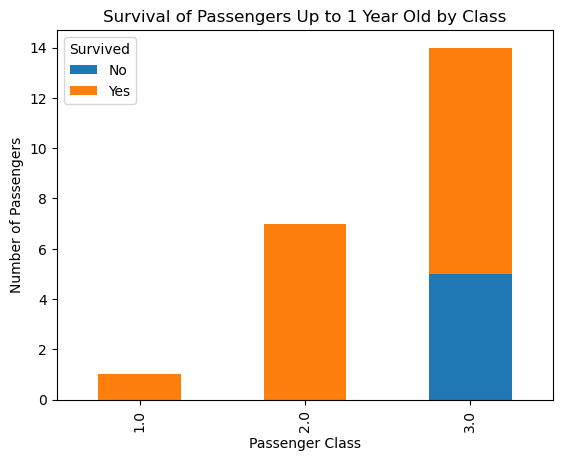

In [32]:
df = df

# Filter passengers who are 1 year old or younger
infants_df = df[df['age'] <= 1]

# Drop rows with missing values in 'survived' or 'pclass'
infants_df = infants_df.dropna(subset=['survived', 'pclass'])

# Group by class and survival status, then count
grouped = infants_df.groupby(['pclass', 'survived']).size().unstack()

# Plotting
fig, ax = plt.subplots()
grouped.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Survival of Passengers Up to 1 Year Old by Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Number of Passengers')
ax.legend(title='Survived', labels=['No', 'Yes'])

# Save the plot as a PNG file
plt.savefig('infant_survival_by_class.png')

# Wnioski : Zginęło najwięcej ludzi z 3 klasy, najwięcej też mężczyzn ogółem 682, zginęło dzieci, w pierwszej klasie 2, w drugiej 4 i w trzeciej 67. Zginęło też 5 niemowlaczków, 5 w trzeciej klasie.

# Cabiny

In [33]:
df['cabin'].count()

295

In [34]:
survived_counts = df.groupby(['cabin','pclass']).size().unstack()
survived_counts

pclass,1.0,2.0,3.0
cabin,,,
A10,1.0,NaN,NaN
A11,1.0,NaN,NaN
A14,1.0,NaN,NaN
A16,1.0,NaN,NaN
A18,1.0,NaN,NaN
...,...,...,...
F33,NaN,4.0,NaN
F38,NaN,NaN,1.0
F4,NaN,4.0,NaN


## duzo brakujacych wartosci

In [35]:
df[df['cabin'].notna()].groupby('pclass').size().reset_index()

,pclass,0
0,1.0,256
1,2.0,23
2,3.0,16


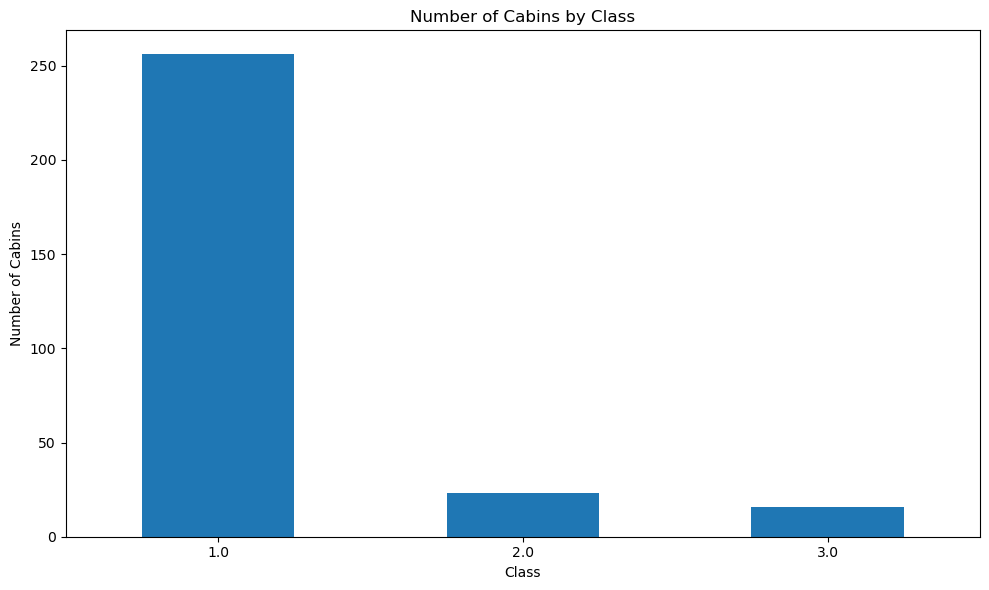

In [36]:
df = df

# Drop rows with NaN values in 'cabin' or 'pclass'
df_cleaned = df.dropna(subset=['cabin', 'pclass'])

# Group by 'pclass' and count the number of occurrences of each 'cabin'
cabin_counts = df_cleaned.groupby('pclass')['cabin'].count()

# Plotting
plt.figure(figsize=(10, 6))
cabin_counts.plot(kind='bar')
plt.title('Number of Cabins by Class')
plt.xlabel('Class')
plt.ylabel('Number of Cabins')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "cabin_by_class.png"
plt.savefig(plot_filename)

# Wnioski : Dużo brakujących danych ale widzimy wyrażnie, że prawie wszystkie należa do pierwszej klasy

# boat

In [37]:
df['boat'].count()

486

In [38]:
df['boat'].nunique()

27

In [39]:
boat_df = df.groupby('boat').size().reset_index()
boat_df

,boat,0
0,1,5
1,10,29
2,11,25
3,12,19
4,13,39
5,13 15,2
6,13 15 B,1
7,14,33
8,15,37
9,15 16,1


In [40]:
df[df['boat'].notna()].groupby('pclass').size().reset_index()

,pclass,0
0,1.0,201
1,2.0,112
2,3.0,173


In [41]:
df[df['boat'].notna()].groupby('sex').size().reset_index()

,sex,0
0,female,319
1,male,167


In [ ]:
df = df

# Filter out rows where 'boat' or 'sex' is NaN
filtered_df = df.dropna(subset=['boat', 'sex'])

# Create a bar plot for lifeboats used by passengers, categorized by gender
plt.figure(figsize=(10, 6))
boat_sex_counts = filtered_df.groupby(['boat', 'sex']).size().unstack()
boat_sex_counts.plot(kind='bar', stacked=True)

plt.title('Lifeboat Usage by Gender')
plt.xlabel('Lifeboat Number')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "lifeboat_usage_by_gender.png"
plt.savefig(plot_filename)

# Wnioski : Było 27 łodzi, kobiety i pierwsza klasa przewyższają liczbami dużo nad pozostałymi klasami. 

# Cena biletow

In [42]:
df[['pclass','fare']].groupby('pclass').describe()

fare                                                                 
        count       mean        std  min      25%      50%       75%       max
pclass                                                                        
1.0     323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2.0     277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3.0     708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

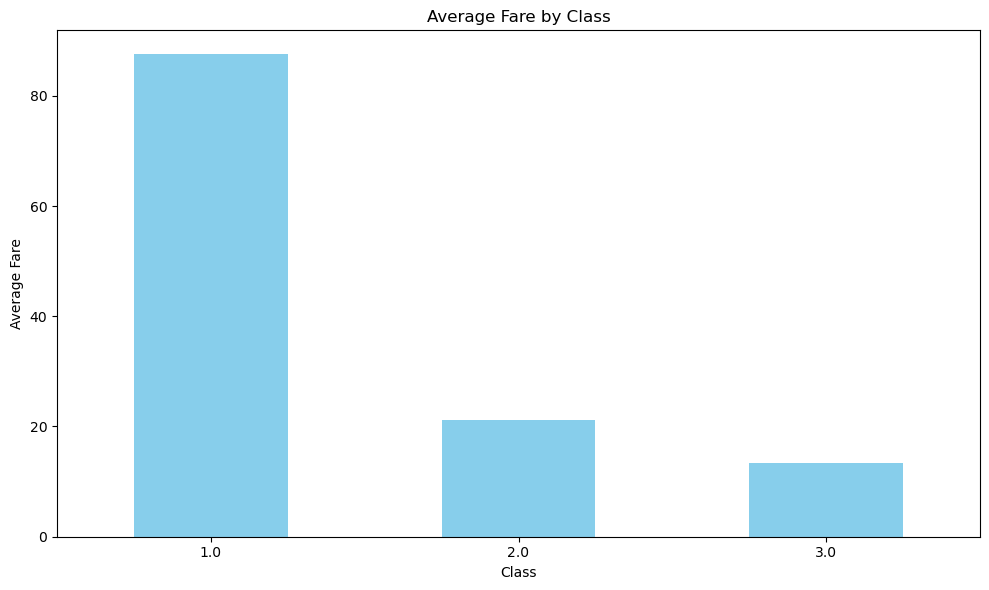

In [43]:
df = df

# Drop rows with missing values in 'fare' or 'pclass'
df_clean = df.dropna(subset=['fare', 'pclass'])

# Create a bar plot for fare by class
plt.figure(figsize=(10, 6))
df_clean.groupby('pclass')['fare'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Fare by Class')
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "fare_by_class.png"
plt.savefig(plot_filename)

In [44]:
df['home.dest'].value_counts().reset_index()

,index,home.dest
0,"New York, NY",64
1,London,14
2,"Montreal, PQ",10
3,"Paris, France",9
4,"Cornwall / Akron, OH",9
...,...,...
364,"Birkdale, England Cleveland, Ohio",1
365,"London / Winnipeg, MB",1
366,"Cooperstown, NY",1
367,"Pomeroy, WA",1


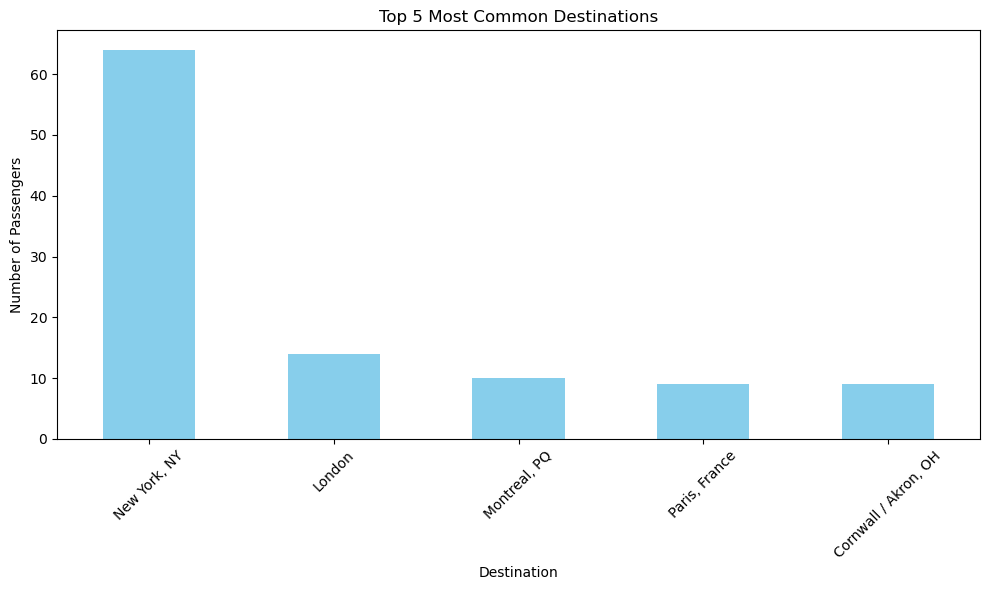

In [45]:
df = df

# Drop NaN values in 'home.dest' column
df = df.dropna(subset=['home.dest'])

# Get the top 5 most common destinations
top_5_destinations = df['home.dest'].value_counts().nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
top_5_destinations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Destinations')
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "top_5_destinations.png"
plt.savefig(plot_filename)

In [46]:
df[df['home.dest'] == 'New York, NY'].groupby('pclass').describe()

survived                                                age             \
          count      mean       std  min  25%  50%  75%  max count       mean   
pclass                                                                          
1.0        55.0  0.654545  0.479899  0.0  0.0  1.0  1.0  1.0  47.0  40.085106   
2.0         6.0  0.500000  0.547723  0.0  0.0  0.5  1.0  1.0   5.0  30.500000   
3.0         3.0  0.333333  0.577350  0.0  0.0  0.0  0.5  1.0   3.0  19.000000   

        ...     fare            body                                     \
        ...      75%       max count  mean        std   min   25%   50%   
pclass  ...                                                               
1.0     ...  79.6500  227.5250   4.0  68.5  50.076608  16.0  32.5  67.0   
2.0     ...  26.4479   30.0708   1.0  43.0        NaN  43.0  43.0  43.0   
3.0     ...  10.1771   12.4750   0.0   NaN        NaN   NaN   NaN   NaN   

                      
          75%    max  
pclass                
1.0     103.0  124.0  
2.0      43.0   43.0  
3.0       NaN    NaN  

[3 rows x 48 columns]

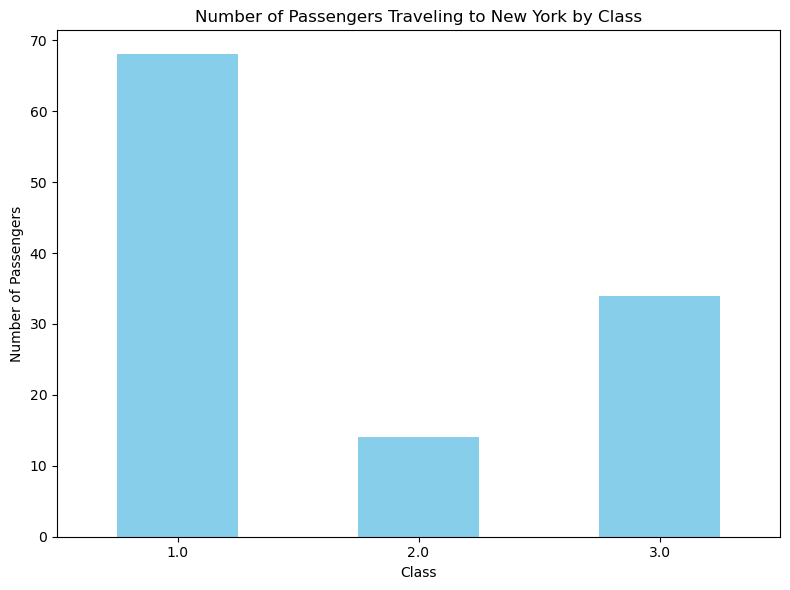

In [47]:
df = df

# Filter passengers whose destination is New York
ny_passengers = df[df['home.dest'].str.contains('New York', na=False)]

# Group by class and count the number of passengers in each class
class_counts = ny_passengers['pclass'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Passengers Traveling to New York by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = 'ny_passengers_by_class.png'
plt.savefig(plot_filename)

In [48]:
df[df['home.dest'] == 'New York, NY'].groupby('fare').describe()

pclass                                    survived            ...  \
          count mean  std  min  25%  50%  75%  max    count      mean  ...   
fare                                                                   ...   
5.0000      1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000  ...   
7.7417      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0      1.0  0.000000  ...   
7.8792      1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0      1.0  0.000000  ...   
12.4750     1.0  3.0  NaN  3.0  3.0  3.0  3.0  3.0      1.0  1.000000  ...   
13.0000     1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0      1.0  1.000000  ...   
13.7917     1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0      1.0  1.000000  ...   
15.0458     1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0      1.0  0.000000  ...   
15.5792     1.0  2.0  NaN  2.0  2.0  2.0  2.0  2.0      1.0  0.000000  ...   
25.7000     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
25.9250     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000  ...   
25.9292     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
26.0000     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
26.2833     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
26.2875     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
26.5500     4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      4.0  0.750000  ...   
27.7208     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  1.000000  ...   
27.7500     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000  ...   
30.0000     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
30.0708     2.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0      2.0  0.500000  ...   
30.6958     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000  ...   
31.6792     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000  ...   
31.6833     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
34.6542     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000  ...   
52.0000     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.500000  ...   
52.5542     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  1.000000  ...   
53.1000     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.500000  ...   
57.7500     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  1.000000  ...   
59.4000     4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      4.0  0.750000  ...   
63.3583     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  1.000000  ...   
71.2833     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.500000  ...   
76.7292     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  1.000000  ...   
79.2000     3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      3.0  0.333333  ...   
79.6500     3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      3.0  0.666667  ...   
82.1708     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.500000  ...   
83.1583     1.0  1.0  NaN  1.0  1.0  1.0  1.0  1.0      1.0  1.000000  ...   
83.4750     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.500000  ...   
133.6500    2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  1.000000  ...   
221.7792    2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      2.0  0.000000  ...   
227.5250    3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0      3.0  0.666667  ...   

         parch       body                                                
           75%  max count   mean std    min    25%    50%    75%    max  
fare                                                                     
5.0000     0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
7.7417     0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
7.8792     0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
12.4750    0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
13.0000    0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
13.7917    0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
15.0458    0.0  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN  

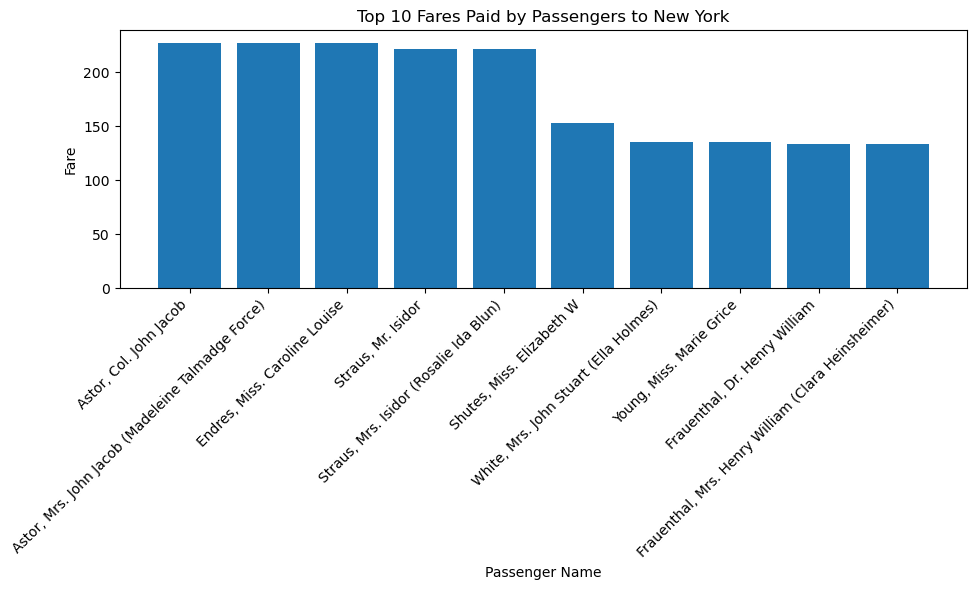

In [49]:
df = df

# Filter the DataFrame for passengers with destination New York
ny_passengers = df[df['home.dest'].str.contains('New York', na=False)]

# Sort by fare and get the top 10 fares
top_10_fares = ny_passengers.nlargest(10, 'fare')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_fares['name'], top_10_fares['fare'])
plt.xlabel('Passenger Name')
plt.ylabel('Fare')
plt.title('Top 10 Fares Paid by Passengers to New York')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "top_10_fares_ny.png"
plt.savefig(plot_filename)

In [50]:
df[df['home.dest'] == 'London'].groupby('pclass').describe()

survived                                           age        ...  \
          count mean       std  min  25%  50%  75%  max count  mean  ...   
pclass                                                               ...   
1.0         2.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   2.0  41.5  ...   
2.0        10.0  0.5  0.527046  0.0  0.0  0.5  1.0  1.0  10.0  41.4  ...   
3.0         2.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   2.0  27.0  ...   

           fare         body                                                
            75%    max count   mean std    min    25%    50%    75%    max  
pclass                                                                      
1.0     26.4125  26.55   1.0  109.0 NaN  109.0  109.0  109.0  109.0  109.0  
2.0     27.0000  30.00   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
3.0      8.0500   8.05   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  

[3 rows x 48 columns]

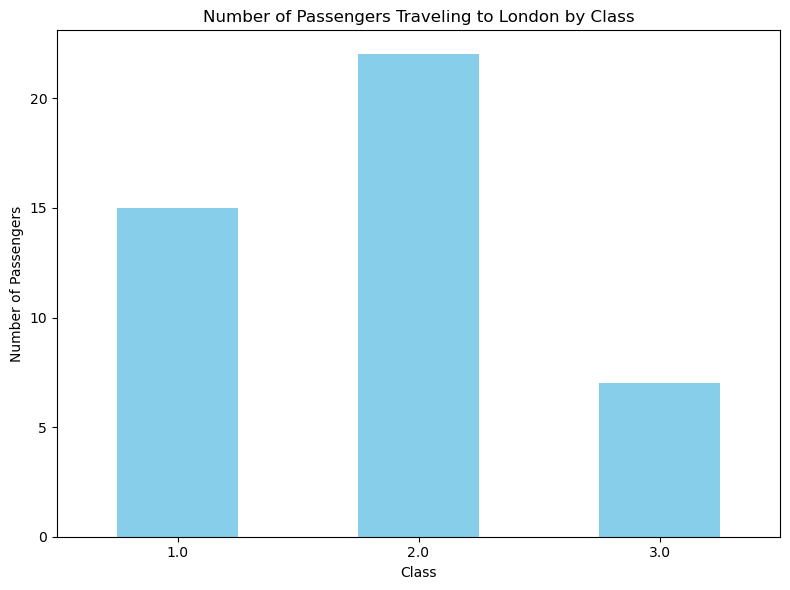

In [51]:
df = df

# Filter passengers whose destination is London
london_passengers = df[df['home.dest'].str.contains('London', na=False)]

# Group by class and count the number of passengers in each class
class_counts = london_passengers['pclass'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Passengers Traveling to London by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = 'london_passengers_by_class.png'
plt.savefig(plot_filename)

In [52]:
third_class_passengers = df[df['pclass'] == 3.0]
third_class_passengers.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,195.0,195.000000,181.000000,195.000000,195.000000,195.000000,13.000000
mean,3.0,0.282051,23.753223,0.738462,0.651282,14.966344,146.692308
std,0.0,0.451156,11.458788,1.303567,1.171586,11.471782,84.752959
min,3.0,0.000000,0.166700,0.000000,0.000000,4.012500,51.000000
25%,3.0,0.000000,18.000000,0.000000,0.000000,7.762500,79.000000
50%,3.0,0.000000,23.000000,0.000000,0.000000,8.050000,103.000000
75%,3.0,1.000000,32.000000,1.000000,1.000000,17.800000,197.000000
max,3.0,1.000000,59.000000,5.000000,6.000000,56.495800,299.000000


In [53]:
third_class_passengers = df.groupby('home.dest')['ticket'].count()
third_class_passengers

home.dest
?Havana, Cuba                          1
Aberdeen / Portland, OR                2
Albany, NY                             1
Altdorf, Switzerland                   2
Amenia, ND                             2
                                      ..
Worcester, England                     1
Worcester, MA                          2
Yoevil, England / Cottage Grove, OR    1
Youngstown, OH                         4
Zurich, Switzerland                    3
Name: ticket, Length: 369, dtype: int64

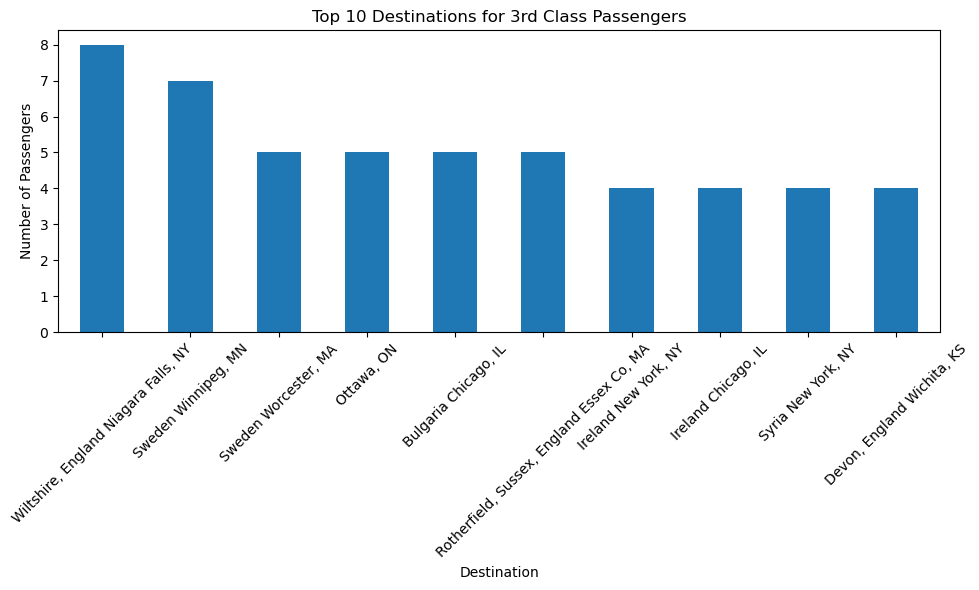

In [54]:
df = df

# Filter the DataFrame for passengers in 3rd class
third_class_passengers = df[df['pclass'] == 3.0]

# Count the number of passengers by destination
destination_counts = third_class_passengers['home.dest'].value_counts().head(10)  # Top 10 destinations

# Plotting
plt.figure(figsize=(10, 6))
destination_counts.plot(kind='bar')
plt.title('Top 10 Destinations for 3rd Class Passengers')
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = 'third_class_destinations.png'
plt.savefig(plot_filename)

In [55]:
df[df['home.dest'] == 'New York, NY'].groupby('sex').describe()

pclass                                              survived            \
        count      mean       std  min  25%  50%  75%  max    count      mean   
sex                                                                             
female   31.0  1.225806  0.560338  1.0  1.0  1.0  1.0  3.0     31.0  0.903226   
male     33.0  1.151515  0.441674  1.0  1.0  1.0  1.0  3.0     33.0  0.363636   

        ...     fare           body                                           \
        ...      75%      max count  mean        std   min   25%   50%   75%   
sex     ...                                                                    
female  ...  79.6500  227.525   0.0   NaN        NaN   NaN   NaN   NaN   NaN   
male    ...  76.7292  227.525   5.0  63.4  44.841945  16.0  38.0  43.0  96.0   

               
          max  
sex            
female    NaN  
male    124.0  

[2 rows x 56 columns]

In [56]:
df[df['home.dest'] == 'London'].groupby('sex').describe()

pclass                                         survived        ...  \
        count mean       std  min  25%  50%  75%  max    count  mean  ...   
sex                                                                   ...   
female    4.0  2.0  0.000000  2.0  2.0  2.0  2.0  2.0      4.0  0.75  ...   
male     10.0  2.0  0.666667  1.0  2.0  2.0  2.0  3.0     10.0  0.20  ...   

        fare        body                                                
         75%   max count   mean std    min    25%    50%    75%    max  
sex                                                                     
female  30.0  30.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
male    26.0  27.0   1.0  109.0 NaN  109.0  109.0  109.0  109.0  109.0  

[2 rows x 56 columns]

In [57]:
df[df['home.dest'] == 'London'].groupby('fare').describe()

pclass                                             survived            \
       count      mean      std  min  25%  50%  75%  max    count      mean   
fare                                                                          
8.05     2.0  3.000000  0.00000  3.0  3.0  3.0  3.0  3.0      2.0  0.000000   
10.50    1.0  2.000000      NaN  2.0  2.0  2.0  2.0  2.0      1.0  1.000000   
13.00    3.0  2.000000  0.00000  2.0  2.0  2.0  2.0  2.0      3.0  0.333333   
26.00    3.0  1.666667  0.57735  1.0  1.5  2.0  2.0  2.0      3.0  0.000000   
26.55    1.0  1.000000      NaN  1.0  1.0  1.0  1.0  1.0      1.0  0.000000   
27.00    2.0  2.000000  0.00000  2.0  2.0  2.0  2.0  2.0      2.0  0.500000   
30.00    2.0  2.000000  0.00000  2.0  2.0  2.0  2.0  2.0      2.0  1.000000   

       ... parch       body                                                
       ...   75%  max count   mean std    min    25%    50%    75%    max  
fare   ...                                                                 
8.05   ...  0.00  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
10.50  ...  0.00  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
13.00  ...  0.00  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
26.00  ...  0.00  0.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
26.55  ...  0.00  0.0   1.0  109.0 NaN  109.0  109.0  109.0  109.0  109.0  
27.00  ...  0.75  1.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  
30.00  ...  1.75  2.0   0.0    NaN NaN    NaN    NaN    NaN    NaN    NaN  

[7 rows x 48 columns]

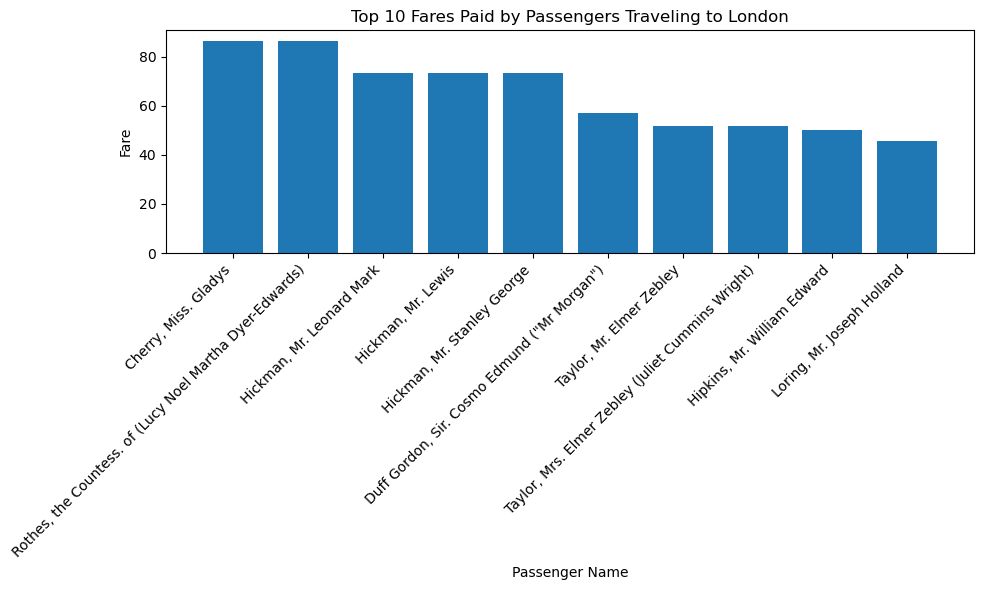

In [58]:
df = df

# Filter the DataFrame for passengers whose destination is London
london_passengers = df[df['home.dest'].str.contains('London', na=False)]

# Sort by fare and get the top 10 fares
top_10_fares = london_passengers.nlargest(10, 'fare')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10_fares['name'], top_10_fares['fare'])
plt.xlabel('Passenger Name')
plt.ylabel('Fare')
plt.title('Top 10 Fares Paid by Passengers Traveling to London')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = "top_10_fares_london.png"
plt.savefig(plot_filename)

# Wnioski : Na pierwszym miejscu miejsca docelowego pierwszej klasy był Nowy Tork, druga klasa wybierała Londyn a trzecia klasa wybierała dużo innych miejsc, które możemy zobaczyć na wykresie, najwięcej to Wiltshire, England Niagara Falls i Nowy York, Sweden i reszta.

In [59]:
df['fare'].max()

512.3292

In [60]:
df[df['fare'] > 500].reset_index()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,49,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
1,50,1.0,1.0,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0.0,1.0,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"


In [61]:
df[df['fare'] == 0].reset_index()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
1,70,1.0,0.0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0.0,0.0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
2,170,1.0,1.0,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,0.0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool
3,223,1.0,0.0,"Parr, Mr. William Henry Marsh",male,NaN,0.0,0.0,112052,0.0,NaN,S,NaN,NaN,Belfast
4,234,1.0,0.0,"Reuchlin, Jonkheer. John George",male,38.0,0.0,0.0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
5,363,2.0,0.0,"Campbell, Mr. William",male,NaN,0.0,0.0,239853,0.0,NaN,S,NaN,NaN,Belfast
6,384,2.0,0.0,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,0.0,239853,0.0,NaN,S,NaN,NaN,Belfast
7,410,2.0,0.0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0.0,0.0,239854,0.0,NaN,S,NaN,NaN,Belfast
8,473,2.0,0.0,"Knight, Mr. Robert J",male,NaN,0.0,0.0,239855,0.0,NaN,S,NaN,NaN,Belfast
9,528,2.0,0.0,"Parkes, Mr. Francis ""Frank""",male,NaN,0.0,0.0,239853,0.0,NaN,S,NaN,NaN,Belfast


In [62]:
df[df['fare'] < 400].reset_index()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,838,3.0,0.0,"Gustafsson, Mr. Johan Birger",male,28.0000,2.0,0.0,3101277,7.9250,NaN,S,NaN,NaN,"Ruotsinphytaa, Finland New York, NY"
739,839,3.0,0.0,"Gustafsson, Mr. Karl Gideon",male,19.0000,0.0,0.0,347069,7.7750,NaN,S,NaN,NaN,"Myren, Sweden New York, NY"
740,1063,3.0,0.0,"Nirva, Mr. Iisakki Antino Aijo",male,41.0000,0.0,0.0,SOTON/O2 3101272,7.1250,NaN,S,NaN,NaN,"Finland Sudbury, ON"
741,1089,3.0,0.0,"Olsvigen, Mr. Thor Anderson",male,20.0000,0.0,0.0,6563,9.2250,NaN,S,NaN,89.0,"Oslo, Norway Cameron, WI"


# Wnioski : Najdroższy bilet kosztował 512, ale są tacy co nic nie płacili.

# Liczba rodzenst lub malzonkow

In [37]:
df[['sibsp','name']].groupby('sibsp').describe()

name                                                           
      count unique                                            top freq
sibsp                                                                 
0.0     891    889                               Kelly, Mr. James    2
1.0     319    319                          Zabour, Miss. Thamine    1
2.0      42     42  Appleton, Mrs. Edward Dale (Charlotte Lamson)    1
3.0      20     20                 Fortune, Miss. Alice Elizabeth    1
4.0      22     22        Andersson, Master. Sigvard Harald Elias    1
5.0       6      6                 Goodwin, Master. Harold Victor    1
8.0       9      9                     Sage, Master. Thomas Henry    1

In [63]:
df = df

# Fill NaN values in 'last_name' and 'relatives' columns for processing
df['last_name'] = df['last_name'].fillna('Unknown')
df['relatives'] = df['relatives'].fillna(0)

# Group by 'last_name' and sum the 'relatives' to find the most related last names
related_counts = df.groupby('last_name')['relatives'].sum()

# Sort the counts in descending order and get the top 6
top_related_last_names = related_counts.sort_values(ascending=False).head(6)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_related_last_names.plot(kind='bar', color='skyblue')
plt.title('Top 6 Last Names with Most Relatives on Board')
plt.xlabel('Last Name')
plt.ylabel('Number of Relatives')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = 'top_related_last_names.png'
plt.savefig(plot_filename)

KeyError: 'last_name'

In [64]:
df[df['name'] == 'Sage, Master. Thomas Henry'].groupby('name').describe()

Empty DataFrame
Columns: [(pclass, count), (pclass, mean), (pclass, std), (pclass, min), (pclass, 25%), (pclass, 50%), (pclass, 75%), (pclass, max), (survived, count), (survived, mean), (survived, std), (survived, min), (survived, 25%), (survived, 50%), (survived, 75%), (survived, max), (age, count), (age, mean), (age, std), (age, min), (age, 25%), (age, 50%), (age, 75%), (age, max), (sibsp, count), (sibsp, mean), (sibsp, std), (sibsp, min), (sibsp, 25%), (sibsp, 50%), (sibsp, 75%), (sibsp, max), (parch, count), (parch, mean), (parch, std), (parch, min), (parch, 25%), (parch, 50%), (parch, 75%), (parch, max), (fare, count), (fare, mean), (fare, std), (fare, min), (fare, 25%), (fare, 50%), (fare, 75%), (fare, max), (body, count), (body, mean), (body, std), (body, min), (body, 25%), (body, 50%), (body, 75%), (body, max)]
Index: []

[0 rows x 56 columns]

In [65]:
df[df['name'] == 'Goodwin, Master. Harold Victor'].groupby('name').describe()

pclass                                    \
                                count mean std  min  25%  50%  75%  max   
name                                                                      
Goodwin, Master. Harold Victor    1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0   

                               survived       ...  fare        body           \
                                  count mean  ...   75%   max count mean std   
name                                          ...                              
Goodwin, Master. Harold Victor      1.0  0.0  ...  46.9  46.9   0.0  NaN NaN   

                                                    
                               min 25% 50% 75% max  
name                                                
Goodwin, Master. Harold Victor NaN NaN NaN NaN NaN  

[1 rows x 56 columns]

# Wnioski : Największa liczba pokrewieństwa to nazwisko Sage az 8 osób, potem Goodwin 5 osób i reszta z listy.

# Body

In [66]:
df['body'].count()

73

In [67]:
bodies_not_found = df['body'].isna().sum()
bodies_not_found

672

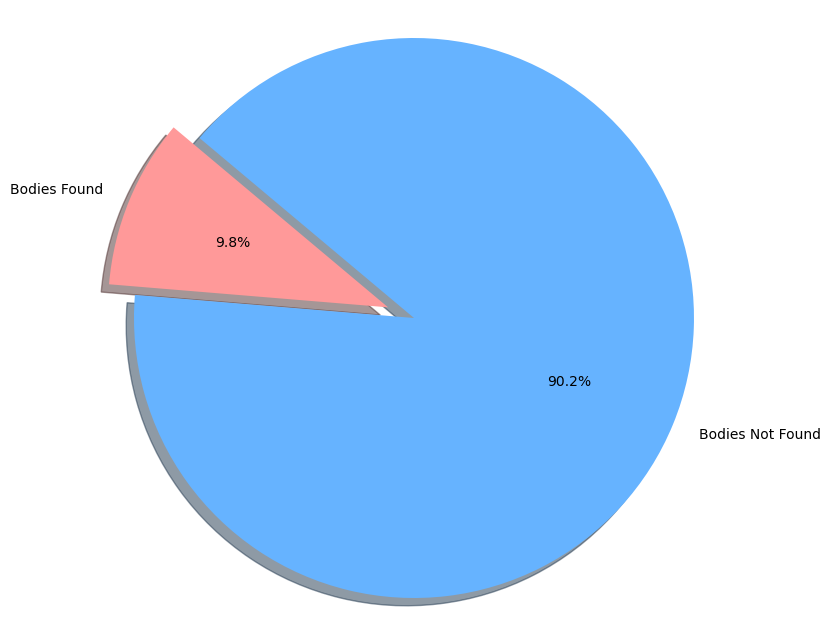

In [68]:
df = df

# Calculate the number of bodies found and not found
bodies_found = df['body'].notna().sum()
bodies_not_found = df['body'].isna().sum()

# Create a pie chart
labels = ['Bodies Found', 'Bodies Not Found']
sizes = [bodies_found, bodies_not_found]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot as a PNG file
plot_filename = "bodies_pie_chart.png"
plt.savefig(plot_filename)

In [69]:
df_body = df.groupby(['name','body']).size().unstack()
df_body

body,15.0,16.0,17.0,18.0,19.0,22.0,35.0,38.0,43.0,46.0,...,283.0,286.0,287.0,292.0,293.0,295.0,297.0,299.0,307.0,322.0
name,,,,,,,,,,,,,,,,,,,,,
"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Adahl, Mr. Mauritz Nils Martin",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Adams, Mr. John",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Ali, Mr. William",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Allison, Mr. Hudson Joshua Creighton",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Sutton, Mr. Frederick",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Van der hoef, Mr. Wyckoff",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Weisz, Mr. Leopold",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [70]:
df_body = df.groupby('pclass')['body'].count()
df_body

pclass
1.0    32
2.0    28
3.0    13
Name: body, dtype: int64

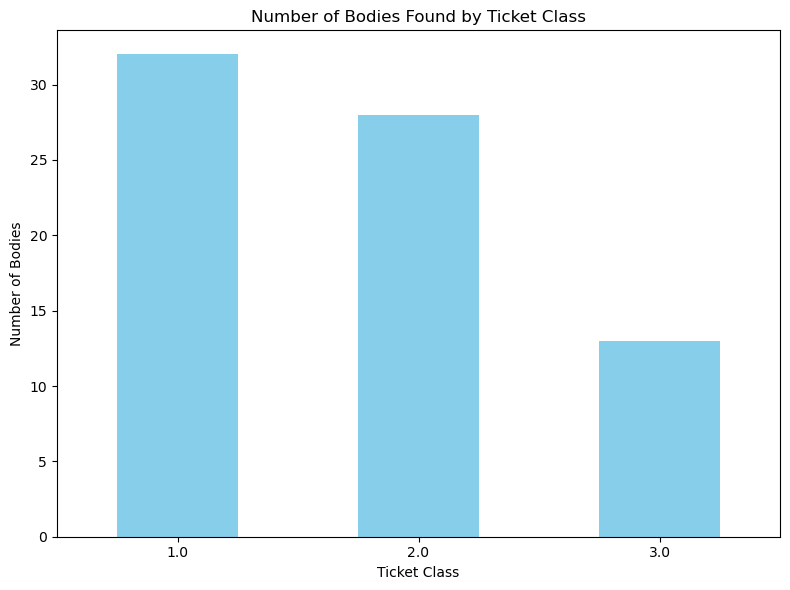

In [71]:
df = df

# Filter the data to include only rows where the passenger did not survive and the body was found
bodies_df = df[(df['survived'] == 0) & (df['body'].notna())]

# Group by 'pclass' and count the number of bodies
bodies_by_class = bodies_df.groupby('pclass')['body'].count()

# Plotting
plt.figure(figsize=(8, 6))
bodies_by_class.plot(kind='bar', color='skyblue')
plt.title('Number of Bodies Found by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Number of Bodies')
plt.xticks(rotation=0)
plt.tight_layout()

# Save the plot as a PNG file
plot_filename = 'bodies_by_class.png'
plt.savefig(plot_filename)

# Wnioski : Odnotowano 121 ciał, ciała zaginione to 1189, czyli 90,8% ciał zaginionych. Odnalezione ciała to raptem 9,2%

# Zobaczmy jakie tytuły posiadają pasarzerowie

In [72]:
# TODO: import the required dependencies
import pandas as pd

# Extract the titles from the 'name' column
def extract_title(name):
    if pd.isna(name):
        return None
    return name.split(',')[1].split('.')[0].strip()

# Apply the function to extract titles
df['title'] = df['name'].apply(extract_title)

# Get unique titles
unique_titles = df['title'].dropna().unique()

In [73]:
unique_titles = df["title"].value_counts().reset_index().sort_values(by='title', ascending=False)
unique_titles.columns = ['tytuł', 'liczba pasażerów']
unique_titles

,tytuł,liczba pasażerów
0,Mr,401
1,Mrs,154
2,Miss,128
3,Master,32
4,Dr,8
5,Rev,7
6,Col,4
7,Major,2
8,Mme,1
9,Capt,1


# Widzimy, że najwięcej jest Panów 757, Miss 260 i Mrs 197 reszta już pojedyncze osoby, mamy 8 doktorów, 1 Capitan.

In [74]:
df = df

# Filter passengers with the title 'Dr'
dr_passengers = df[df['name'].str.contains('Dr\.', na=False)]

# Declare result variable
result = {
    "type": "dataframe",
    "value": dr_passengers
}
dr_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
93,1.0,1.0,"Dodge, Dr. Washington",male,53.0,1.0,1.0,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr
119,1.0,1.0,"Frauenthal, Dr. Henry William",male,50.0,2.0,0.0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr
181,1.0,1.0,"Leader, Dr. Alice (Farnham)",female,49.0,0.0,0.0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr
206,1.0,0.0,"Minahan, Dr. William Edward",male,44.0,2.0,0.0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr
278,1.0,1.0,"Stahelin-Maeglin, Dr. Max",male,32.0,0.0,0.0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr
508,2.0,0.0,"Moraweck, Dr. Ernest",male,54.0,0.0,0.0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr
525,2.0,0.0,"Pain, Dr. Alfred",male,23.0,0.0,0.0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr


# Było 8 doktorów i w nich tylko jedna kobieta Leader, Dr. Alice (Farnham), której udało się przeżyć, panów Doktorów tylko 3 przeżyło. Każdy Doktor trafił do innej łodzi.

In [75]:
df = df

# Filter passengers with the title "Lady"
lady_passengers = df[df['name'].str.contains('Lady', na=False)]

# Declare result var
result = {
    "type": "dataframe",
    "value": lady_passengers
}
lady_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
99,1.0,1.0,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1.0,0.0,11755,39.6,A16,C,1,NaN,London / Paris,Lady


# Duff Gordon, Lady. (Lucille Christiana przeżyła 

In [76]:
df = df

# Filter passengers with the title "Lady"
Mlle_passengers = df[df['name'].str.contains('Mlle', na=False)]

# Declare result var
result = {
    "type": "dataframe",
    "value": Mlle_passengers
}
Mlle_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
199,1.0,1.0,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0.0,0.0,PC 17482,49.5042,C90,C,6,NaN,"Belgium Montreal, PQ",Mlle


# Tutaj dwie kobiety przeżyły

In [77]:
df = df

# Filter passengers with the title "Lady"
Sir_passengers = df[df['name'].str.contains('Sir', na=False)]

# Declare result var
result = {
    "type": "dataframe",
    "value": Sir_passengers
}
Sir_passengers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
100,1.0,1.0,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1.0,0.0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,Sir


# Mężczyzna o tytule Sir przeżył

In [ ]:
df = df

# Filter passengers with the title "Lady"
Rev_passengers = df[df['name'].str.contains('Rev', na=False)]

# Declare result var
result = {
    "type": "dataframe",
    "value": Rev_passengers
}
Rev_passengers

# O tytule Rev byli sa mi mężczyżni, nikt nie przeżył

In [4]:
df.insert(3, 'n_split',"")

In [5]:
df.insert(5, 'title',"")

In [6]:
df['n_split'] = df['name'].str.split(",")

In [7]:
df['title'] = df['n_split'].apply(lambda x: x[1] if isinstance(x, list) else None)

In [8]:
df['title'] = df['title'].str.split('.', n=1).str[0]

In [9]:
df.drop('n_split', axis=1, inplace=True)

<Figure size 1000x600 with 0 Axes>

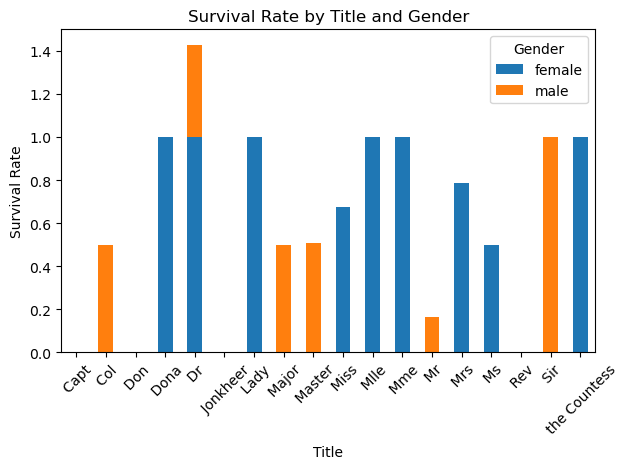

In [10]:
df = df

# Drop rows with missing 'title' or 'survived' values
df = df.dropna(subset=['title', 'survived'])

# Group by 'title' and 'sex', then calculate survival rate
survival_rate = df.groupby(['title', 'sex'])['survived'].mean().unstack()

# Plot the bar chart
plt.figure(figsize=(10, 6))
survival_rate.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Title and Gender')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('survival_rate_by_title_and_gender.png')

# Tytuły miały wpływ na przeżywalność dla osób takich jak Dr (przeżyło połowę mężczyzn i była jedna kobieta też przeżyła), Lady (była jedna i przeżyła), Mlle,Mme (też kobiety i przeżyły) i Sir ( przeżyło połowę, czyli o tych tytułach przeżywały wszystkie kobiety i połowę mężczyzn

# Sprawdżmy wiek pasarzerów w poszczególnych klasach

In [33]:
df = df

# Filter passengers aged between 30 and 40
age_filtered_df = df[(df['age'] >= 20) & (df['age'] <= 40)]

# Count the number of passengers in each class
class_counts = age_filtered_df['pclass'].value_counts()

# Find the class with the most passengers in the specified age range
most_common_class = class_counts.idxmax()
most_common_class

3.0

In [35]:
df = df

# Filter passengers who are 50 years old and above
age_50_and_above = df[df['age'] >= 50]

# Count the number of passengers in each class
class_counts = age_50_and_above['pclass'].value_counts()

# Find the class with the most passengers aged 50 and above
most_common_class = class_counts.idxmax()
most_common_class

1.0

# Sprawdżmy wartości odstające

<Figure size 1000x600 with 0 Axes>

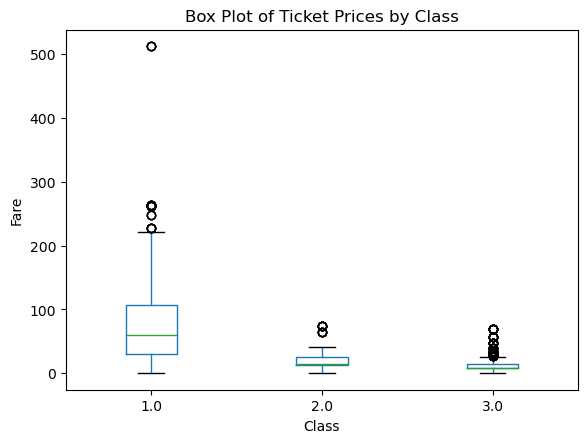

In [12]:
df = df

# Filter out rows with NaN values in 'pclass' or 'fare'
df_filtered = df.dropna(subset=['pclass', 'fare'])

# Create a box plot for fare prices by class
plt.figure(figsize=(10, 6))
df_filtered.boxplot(column='fare', by='pclass')
plt.title('Box Plot of Ticket Prices by Class')
plt.suptitle('')  # Remove the default title to avoid overlap
plt.xlabel('Class')
plt.ylabel('Fare')
plt.grid(False)

# Save the plot as a PNG file
plt.savefig('ticket_prices_boxplot.png')

## Widzimy, że trzecia klasa płaciła za bilet mniej niż 100 dolarów. Druga klasa  minimalnie  więcej. Pierwsza klasa dopiero zaczynali od trochę powyżej 100$, ci jeszcze bogatsi płacili pomiędzy 200 a 300 i najdroższy bilet kosztował ponad 500 dolarów


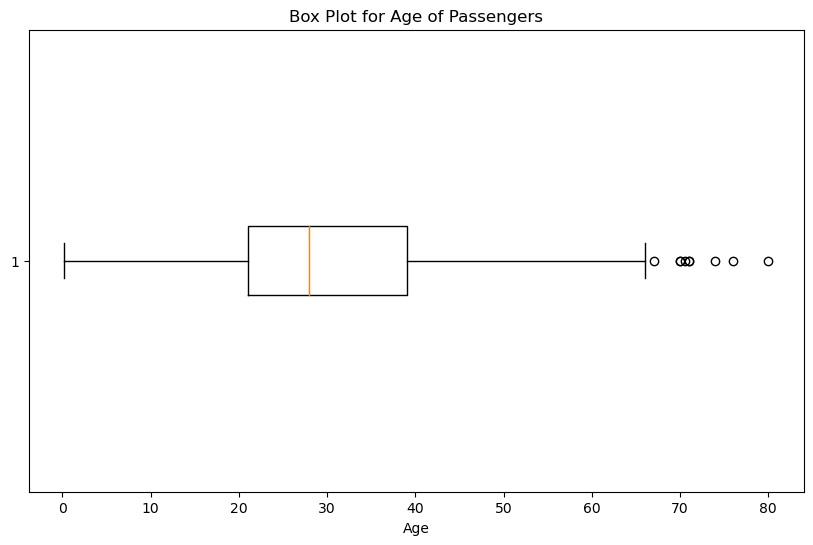

In [11]:
df = df

# Drop NaN values in the 'age' column to ensure accurate plotting
age_data = df['age'].dropna()

# Create a box plot for the age of passengers
plt.figure(figsize=(10, 6))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot for Age of Passengers')
plt.xlabel('Age')

# Save the plot as a PNG file
plt.savefig('age_box_plot.png')

## Widzimy, że najmłodszy pasarzer nie miał skończonego roku, a najstarszy miał 80 lat. Widzimy także, że mamy grupę pasarzerów lekko po 20 roku życia, druga grupa to osoby lekko po 20 do 27-28 roku życia, trzecia grup to osoby od 27-28 roku życia do 39, 4 ostatnia grupa to ludzie od 39 do 68 lat i widzimy że mamy osoby od 68 lat wzwyż do max 80.

<Figure size 1000x600 with 0 Axes>

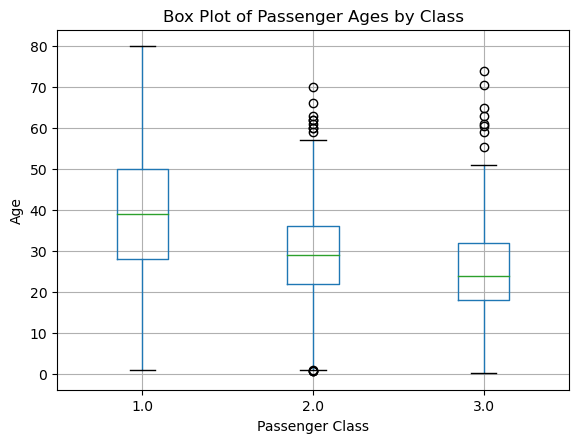

In [13]:
df = df

# Drop rows with NaN values in 'pclass' or 'age' columns
df_cleaned = df.dropna(subset=['pclass', 'age'])

# Create a box plot for age according to passenger class
plt.figure(figsize=(10, 6))
df_cleaned.boxplot(column='age', by='pclass')
plt.title('Box Plot of Passenger Ages by Class')
plt.suptitle('')  # Remove the default title to avoid overlap
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Save the plot as a PNG file
plt.savefig('passenger_age_by_class.png')

## Widzimy, że w pierwszej klasie mamy pasarzerów od niemowląt do naszego najstarszego 80 latka, w drugiej klasie wiek kończy sie przed 60 ale jest kilka osób od 58 lat do 70 i trzecia klasa wieku kończy sie do 50 lat ale też tutaj znajdzie się mniejsza grupa która ma od 51 do 74 lat.

<Figure size 1000x600 with 0 Axes>

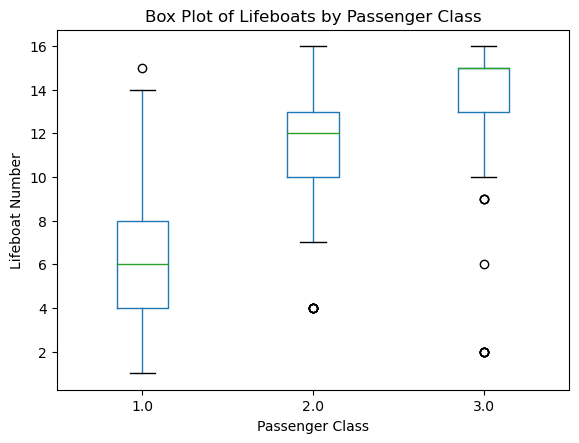

In [15]:
df = df

# Convert 'boat' column to numeric, setting errors='coerce' to handle non-numeric values
df['boat'] = pd.to_numeric(df['boat'], errors='coerce')

# Create a box plot for 'boat' according to 'pclass'
plt.figure(figsize=(10, 6))
df.boxplot(column='boat', by='pclass', grid=False)
plt.title('Box Plot of Lifeboats by Passenger Class')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Passenger Class')
plt.ylabel('Lifeboat Number')

# Save the plot as a PNG file
plot_filename = 'lifeboat_by_class_boxplot.png'
plt.savefig(plot_filename)

## Widzimy jak dużo było przydzielonych łodzi dla pierwszej klasy a jak mało dla trzeciej.

<Figure size 1000x600 with 0 Axes>

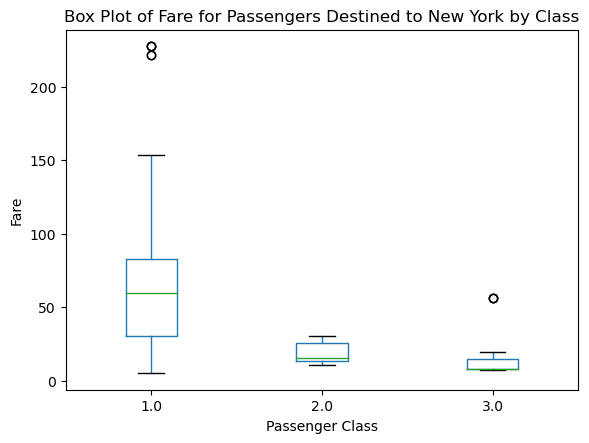

In [26]:
df = df

# Filter the DataFrame for passengers with "New York" in their home.dest
ny_passengers = df[df['home.dest'].str.contains('New York', na=False)]

# Create a box plot for fare grouped by pclass
plt.figure(figsize=(10, 6))
ny_passengers.boxplot(column='fare', by='pclass')
plt.title('Box Plot of Fare for Passengers Destined to New York by Class')
plt.suptitle('')  # Remove the default suptitle to clean up the plot
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(False)

# Save the plot as a PNG file
plot_filename = 'ny_passengers_fare_by_class.png'
plt.savefig(plot_filename)

## Widzimy, że bilet do Nowego Yorku dla pierwszej klasy max kosztowal troche ponad 150 dolarów, dla drugiej klasy 25 dolarów i tzecia klasa placiła najmniej.

/tmp/ipykernel_152/4231936334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_passengers['num_passengers'] = ny_passengers['sibsp'].fillna(0) + ny_passengers['parch'].fillna(0)


<Figure size 1000x600 with 0 Axes>

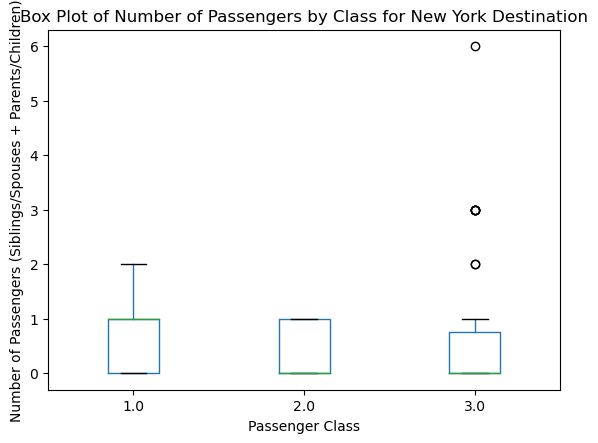

In [27]:
df = df

# Filter the DataFrame for passengers with destination New York
ny_passengers = df[df['home.dest'].str.contains('New York', na=False)]

# Create a box plot for the number of passengers (sibsp + parch) by class
ny_passengers['num_passengers'] = ny_passengers['sibsp'].fillna(0) + ny_passengers['parch'].fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
ny_passengers.boxplot(column='num_passengers', by='pclass')
plt.title('Box Plot of Number of Passengers by Class for New York Destination')
plt.suptitle('')  # Remove the default title to avoid overlap
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers (Siblings/Spouses + Parents/Children)')
plt.grid(False)

# Save the plot as a PNG file
plt.savefig('ny_passengers_boxplot.png')

## Najwięcej ludzi płynęło do Nowego Yorku z pierwszej klasy 

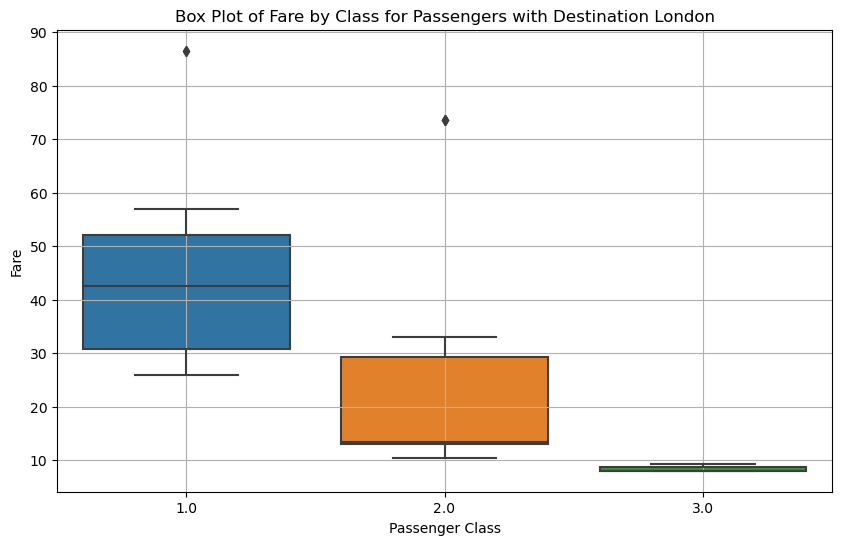

In [30]:
london_passengers = df[df['home.dest'].str.contains('London', na=False)]

# Create a box plot for 'pclass' of passengers with destination London
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=london_passengers)
plt.title('Box Plot of Fare by Class for Passengers with Destination London')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('london_class_boxplot.png')

## Tutaj też przeważa pierwsza klasa i nieliczni z trzeciej klasy

<Figure size 1000x600 with 0 Axes>

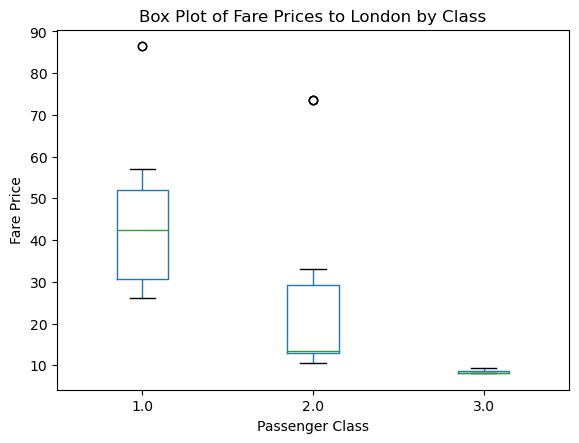

In [31]:
# Filter the DataFrame for passengers whose destination is London
london_passengers = df[df['home.dest'].str.contains('London', na=False)]

# Create a box plot for fare prices according to passenger class
plt.figure(figsize=(10, 6))
london_passengers.boxplot(column='fare', by='pclass')
plt.title('Box Plot of Fare Prices to London by Class')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Passenger Class')
plt.ylabel('Fare Price')
plt.grid(False)

# Save the plot as a PNG file
plt.savefig('fare_boxplot_london.png')

## Trzecia klasa za Londyn prawie nic nie płaciła porównując do pierwszej klasy która max zapłaciła ponad 50 dolarów i ktoś aż 88 dolarów.

## Podsumowanie wszystkiego: 
## Najwięcej ludzi jako miejsce docelowe wybierali New York potem Londyn
## Najwięcej ludzi wsiadło w porcie S potem C i najmniej w Q
## Wyróżniamy 3 klasy; Pierwsza najbogatsi, druga pośrednio i trzecia klasa najbiedniejsza
## Przeżywalność: W przeżywalności dostrzegłem, że tytuły Dr, Lady, Mlle i Mme dla kobiet to 100% przeżycia, dla mężczyzn tytuły Dr, Major, Sir to 50% przeżycia
## 100% przeżycia też miały niemowlaczki z 1 i 2 klasy, z trzeciej niestety ok połowa
## Bez tych tytułów najwięcej przeżyło kobiet z pierwszej klasy, mężczyzn najwięcej przeżyło z pierwszej klasy a z trzeciej tu już większość nie miała szans
## dla dzieci najmniejsze szanse były w 3 klasie w pierwszej i drugiej klasie zginęło garsta.
## Możemy zauważyć, że pasażerowie w wieku od 20 do 40 lat podróżowali 3 klasa, a od 40 wzwyż pierwszą klasą
## Oczywiście byli pasażerowie ze sobą spokrewnieni, wyróżniamy tutaj nazwisko Sage 9 osób, czy Goodwin 6 osób
## Ceny biletów były najtańsze w 3 klasie, gdzie są osoby, które nic nie zapłaciły i najdroższe w pierwszej klasie, tam cena rosła, możemy się domyśleć, że najbogatsi mieli lepszy luksus, czyli większą kapinę, może szampan do kawioru skoro najdroższy bilet kosztował 512 dolarów to pewnie za to.
## Cabiny i łodzie były najwięcej dla pierwszej klasy. Są osoby które nie miały cabiny i nie załapały się do łodzi.
## Odnalezione ciała to tylko 9,8% z ofiar, reszta zaginęła.

In [2]:
!jupyter nbconvert Titanik.ipynb --to html --no-input --no-prompt --output Titanik.html

[NbConvertApp] Converting notebook Titanik.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 28 image(s).
[NbConvertApp] Writing 1476169 bytes to Titanik.html
